In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
import random
import matplotlib.pyplot as plt

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
model = SentenceTransformer('KiruruP/anime-recommendation-multilingual-mpnet-base-v2-peft')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/283 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/312 [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/inference.csv')

In [ ]:
df['text_corpus'] = (df['title'] + ' | ' + df['genres'] + ' | ' + df['synopsis'])
df

,mal_id,url,title,image_jpg_url,type,episodes,rating,score,synopsis,genres,q,base_title,base_title_norm,title_group,text_corpus
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,Sousou no Frieren,https://cdn.myanimelist.net/images/anime/1015/...,TV,28.0,PG-13 - Teens 13 or older,9.30,During their decade-long quest to defeat the D...,"Adventure, Drama, Fantasy","""What is a story about a group of heroes on a ...",Sousou no Frieren,sousou no frieren,sousou no frieren,"Sousou no Frieren | Adventure, Drama, Fantasy ..."
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,https://cdn.myanimelist.net/images/anime/1208/...,TV,64.0,R - 17+ (violence & profanity),9.10,After a horrific alchemy experiment goes wrong...,"Action, Adventure, Drama, Fantasy",What is a story about two brothers who undergo...,Fullmetal Alchemist: Brotherhood,fullmetal alchemist brotherhood,fullmetal alchemist brotherhood,"Fullmetal Alchemist: Brotherhood | Action, Adv..."
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,https://cdn.myanimelist.net/images/anime/1935/...,TV,24.0,PG-13 - Teens 13 or older,9.07,Eccentric scientist Rintarou Okabe has a never...,"Drama, Sci-Fi, Suspense",What is a query for an anime about a group of ...,Steins;Gate,steinsgate,steinsgate,"Steins;Gate | Drama, Sci-Fi, Suspense | Eccent..."
3,39486,https://myanimelist.net/anime/39486/Gintama__T...,Gintama: The Final,https://cdn.myanimelist.net/images/anime/1245/...,Movie,1.0,PG-13 - Teens 13 or older,9.04,Two years have passed following the Tendoshuu'...,"Action, Comedy, Drama, Sci-Fi",How can I find an anime where the main charact...,Gintama: The,gintama the,gintama the,"Gintama: The Final | Action, Comedy, Drama, Sc..."
4,11061,https://myanimelist.net/anime/11061/Hunter_x_H...,Hunter x Hunter (2011),https://cdn.myanimelist.net/images/anime/1337/...,TV,148.0,PG-13 - Teens 13 or older,9.03,Hunters devote themselves to accomplishing haz...,"Action, Adventure, Fantasy",What is a query for an anime about young peopl...,Hunter x Hunter (2011),hunter x hunter 2011,hunter x hunter 2011,"Hunter x Hunter (2011) | Action, Adventure, Fa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,6472,https://myanimelist.net/anime/6472/Gakkou_no_K...,Gakkou no Kowai Uwasa: Hanako-san ga Kita!!,https://cdn.myanimelist.net/images/anime/5/147...,TV,35.0,PG-13 - Teens 13 or older,6.32,"Based on the short story ""Ghost Toilet"" from T...",Horror,NaN,Gakkou no Kowai Uwasa: Hanako-san ga Kita,gakkou no kowai uwasa hanakosan ga kita,gakkou no kowai uwasa hanakosan ga kita,Gakkou no Kowai Uwasa: Hanako-san ga Kita!! | ...
4182,33531,https://myanimelist.net/anime/33531/Juushinki_...,Juushinki Pandora,https://cdn.myanimelist.net/images/anime/1897/...,TV,26.0,PG-13 - Teens 13 or older,6.32,The series is set in a near-future world where...,Sci-Fi,NaN,Juushinki Pandora,juushinki pandora,juushinki pandora,Juushinki Pandora | Sci-Fi | The series is set...
4183,36037,https://myanimelist.net/anime/36037/Senran_Kag...,Senran Kagura Shinovi Master: Tokyo Youma-hen,https://cdn.myanimelist.net/images/anime/1022/...,TV,12.0,R+ - Mild Nudity,6.32,Girls study at schools for modern shinobi. The...,"Action, Comedy, Ecchi",NaN,Senran Kagura Shinovi Master: Tokyo Youma-hen,senran kagura shinovi master tokyo youmahen,senran kagura shinovi master tokyo youmahen,Senran Kagura Shinovi Master: Tokyo Youma-hen ...
4184,32888,https://myanimelist.net/anime/32888/Sinbad__Ma...,Sinbad: Mahiru no Yoru to Fushigi no Mon,https://cdn.myanimelist.net/images/anime/3/788...,Movie,1.0,G - All Ages,6.32,The search for Sana’s comrades continues. Sara...,Adventure,NaN,Sinbad: Mahiru no Yoru to Fushigi no Mon,sinbad mahiru no yoru to fushigi no mon,sinbad mahiru no yoru to fushigi no mon,Sinbad: Mahiru no Yoru to Fushigi no Mon | Adv...


In [ ]:
df = df.drop(columns = ['base_title', 'base_title_norm', 'title_group'])
df.to_csv('inference.csv', index = False)

In [ ]:
!cp inference.csv '/content/drive/MyDrive'

In [ ]:
all_title = []
all_synop = []
all_index = []
all_text = []
for i in range(len(df)):
    all_synop.append(str(df.loc[i, 'synopsis']))
    all_title.append(str(df.loc[i, 'title']))
    all_index.append(i)
    all_text.append(str(df.loc[i, 'text_corpus']))

In [ ]:
embeddings = model.encode(all_text, convert_to_tensor = True)

In [ ]:
query = input("Enter your query: ")
q_encode = model.encode(query, convert_to_tensor = True)

Enter your query: miracle generation basketball


tensor([ 351,  167, 2988], device='cuda:0')
Here is the anime recommend from this query: miracle generation basketball

Name:  Kuroko no Basket
Similarity score:  0.835328221321106


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  1,  47, 125],
        [  0,  46, 124],
        [  1,  47, 125]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  1,  47, 125],
        [  0,  46, 124],
        [  1,  47, 125]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  1,  47, 125],
        [  0,  46, 124],
        [  1,  47, 125]],

       ...,

       [[ 86, 165, 242],
        [ 85, 164, 241],
        [ 85, 164, 241],
        ...,
        [234, 237, 230],
        [244, 250, 248],
        [242, 246, 247]],

       [[ 85, 164, 241],
        [ 85, 164, 241],
        [ 84, 163, 240],
        ...,
        [225, 225, 213],
        [254, 255, 250],
        [245, 247, 246]],

       [[ 81, 160, 239],
        [ 81, 160, 239],
        [ 81, 160, 239],
        ...,
        [197, 188, 179],
        [243, 238, 232],
        [246, 245, 243]]], dtype=uint8)
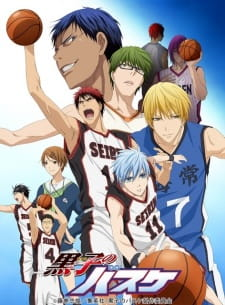

Name:  Kuroko no Basket 3rd Season
Similarity score:  0.8239074945449829


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[252, 197,  81],
        [253, 197,  84],
        [253, 200,  86],
        ...,
        [245, 198,  92],
        [245, 198,  94],
        [245, 200,  97]],

       [[245, 190,  73],
        [246, 191,  75],
        [246, 193,  77],
        ...,
        [245, 198,  90],
        [245, 198,  92],
        [247, 200,  94]],

       [[240, 184,  65],
        [241, 184,  68],
        [240, 188,  70],
        ...,
        [245, 199,  88],
        [245, 199,  88],
        [248, 200,  90]]], dtype=uint8)
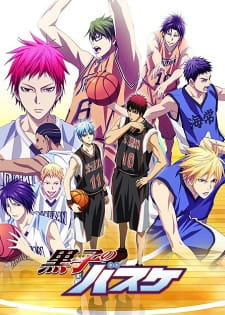

Name:  Ro-Kyu-Bu!
Similarity score:  0.8075600862503052


array([[[251, 237, 236],
        [251, 237, 236],
        [250, 236, 235],
        ...,
        [216, 195, 204],
        [217, 195, 207],
        [217, 195, 207]],

       [[251, 237, 236],
        [251, 237, 236],
        [250, 236, 235],
        ...,
        [216, 195, 204],
        [216, 194, 206],
        [216, 194, 206]],

       [[251, 237, 236],
        [251, 237, 236],
        [250, 236, 235],
        ...,
        [215, 194, 203],
        [216, 194, 206],
        [214, 192, 204]],

       ...,

       [[ 37,  39,  15],
        [ 39,  41,  17],
        [ 41,  43,  19],
        ...,
        [ 41,  43,  19],
        [ 42,  44,  20],
        [ 44,  44,  20]],

       [[ 39,  68,  37],
        [ 41,  70,  39],
        [ 42,  72,  38],
        ...,
        [ 42,  69,  36],
        [ 43,  70,  37],
        [ 44,  69,  37]],

       [[ 37,  83,  46],
        [ 39,  85,  48],
        [ 40,  86,  49],
        ...,
        [ 38,  83,  44],
        [ 39,  84,  45],
        [ 41,  83,  47]]], dtype=uint8)
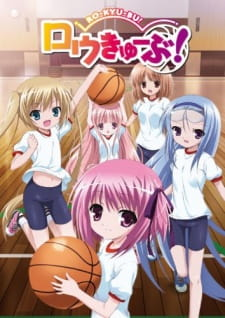

In [ ]:
import imageio.v3 as imageio
cosine_score = util.cos_sim(q_encode, embeddings)
all_index = torch.topk(cosine_score.flatten(), 3).indices
print(all_index)
print(f"Here is the anime recommend from this query: {query}\n")
for i in range(len(all_index)):
  print("Name: ", df.loc[all_index[i].item(), "title"])
  print("Similarity score: ", cosine_score.flatten()[all_index[i].item()].item())
  img_url = df.loc[all_index[i].item(), "image_jpg_url"]
  img = imageio.imread(img_url)
  display(img)